Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


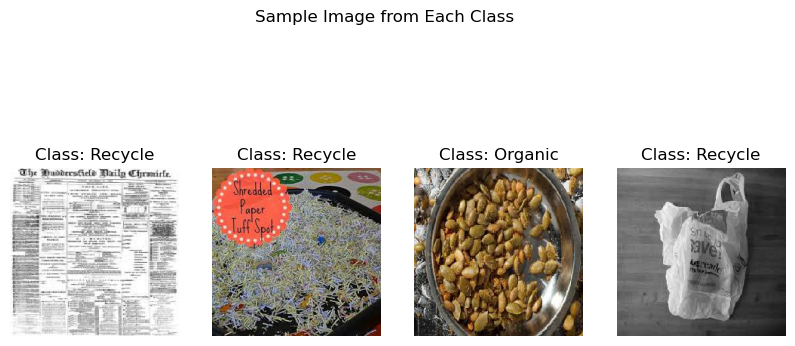

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_dir = r"C:\Users\Soumya\Downloads\archive (1)\DATASET"
train_dir = base_dir + r"\TRAIN"
test_dir = base_dir + r"\TEST"
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode='binary'
)
plt.figure(figsize=(10,5))
for i in range(4):
    image, label = next(train_data)
    plt.subplot(1, 4, i+1)
    plt.imshow(image[0])
    plt.title("Class: " + ("Organic" if label[0] == 0 else "Recycle"))
    plt.axis('off')
plt.suptitle("Sample Image from Each Class")
plt.show()

In [3]:
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')
mobilenet_model.trainable = False
model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#train the model
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=2
)
model.save('mobilenet_waste_classifier.h5')
loss, accuracy = model.evaluate(test_data)
print("Model Accuracy:", accuracy)


Epoch 1/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 838s 1s/step - accuracy: 0.8676 - loss: 0.3059 - val_accuracy: 0.8858 - val_loss: 0.2622
Epoch 2/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 848s 1s/step - accuracy: 0.9338 - loss: 0.1722 - val_accuracy: 0.8993 - val_loss: 0.2398


79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8952 - loss: 0.2443
Model Accuracy: 0.8993235230445862


In [9]:
#evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
y_pred_prob = model.predict(test_data).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)
y_true = test_data.classes
print('Classification Report:\n', classification_report(y_true, y_pred, target_names=['Organic','Recyclable']))
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Martix:\n", conf_matrix)

79/79 ━━━━━━━━━━━━━━━━━━━━ 78s 986ms/step
Classification Report:
               precision    recall  f1-score   support

     Organic       0.55      0.61      0.58      1401
  Recyclable       0.43      0.37      0.40      1112

    accuracy                           0.51      2513
   macro avg       0.49      0.49      0.49      2513
weighted avg       0.50      0.51      0.50      2513

Confusion Martix:
 [[861 540]
 [701 411]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


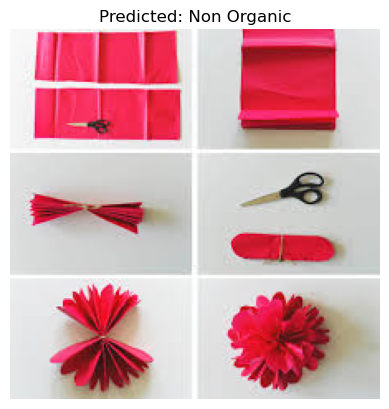

In [11]:
#testing the model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
model_path = 'mobilenet_waste_classifier.h5'
test_image_path = r"C:\Users\Soumya\Downloads\archive (1)\DATASET\TEST\R\R_11096.jpg"
model = tf.keras.models.load_model(model_path)
test_img = load_img(test_image_path, target_size = (224,224))
test_img_array = img_to_array(test_img)/ 255.0
test_img_array = np.expand_dims(test_img_array, axis=0)
predicted_prob = model.predict(test_img_array)[0][0]
predicted_class = 'Organic' if predicted_prob < 0.5 else 'Non Organic'
plt.imshow(test_img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()